Sample dataset:

=== Baseline Model Performance ===
Logistic Regression: Accuracy=0.974, MAE=0.026
Decision Tree: Accuracy=0.994, MAE=0.006

=== Advanced Model Performance ===
Random Forest: Accuracy=0.997, MAE=0.003


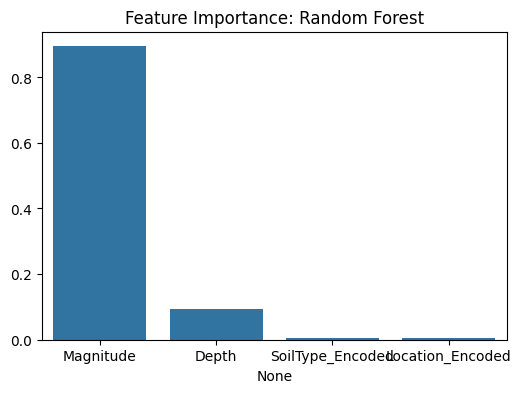

Gradient Boosting: Accuracy=0.993, MAE=0.007


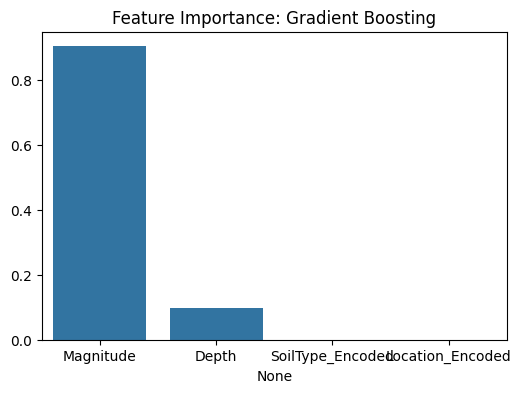

In [ ]:
# --- STEP 0: Install required libraries ---
!pip install scikit-learn --quiet

# --- STEP 1: Imports ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# --- STEP 2: Generate synthetic preprocessed dataset (replace this with your real CSV if available) ---
# Simulate Milestone 1 dataset with relevant features
np.random.seed(42)
N = 10000  # smaller sample for Colab demo

df = pd.DataFrame({
    'Magnitude': np.random.uniform(4.5, 9.5, N),
    'Depth': np.random.uniform(0, 700, N),
    'SoilType_Encoded': np.random.randint(0, 60, N),
    'Location_Encoded': np.random.randint(0, 200, N),
})

# Create a target for classification: High Risk (1) if Risk_Score > threshold else 0
df['Risk_Score'] = 0.7*df['Magnitude'] + 0.3*np.log1p(df['Depth'])
df['High_Risk'] = (df['Risk_Score'] > df['Risk_Score'].median()).astype(int)

print("Sample dataset:")
df.head()

# --- STEP 3: Split data into features and target ---
X = df[['Magnitude', 'Depth', 'SoilType_Encoded', 'Location_Encoded']]
y = df['High_Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- STEP 4: Scale numeric features ---
scaler = StandardScaler()
X_train[['Magnitude', 'Depth']] = scaler.fit_transform(X_train[['Magnitude', 'Depth']])
X_test[['Magnitude', 'Depth']] = scaler.transform(X_test[['Magnitude', 'Depth']])

# --- STEP 5: Baseline Models ---
baseline_models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

print("\n=== Baseline Model Performance ===")
for name, model in baseline_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name}: Accuracy={acc:.3f}, MAE={mae:.3f}")

# --- STEP 6: Advanced Models ---
advanced_models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

print("\n=== Advanced Model Performance ===")
for name, model in advanced_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name}: Accuracy={acc:.3f}, MAE={mae:.3f}")

    # Feature importance
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
        plt.figure(figsize=(6,4))
        sns.barplot(x=X.columns, y=importance)
        plt.title(f"Feature Importance: {name}")
        plt.show()


In [ ]:
# ===============================================
# 🚀 Milestone 2 – Week 3 (Baseline Model Training) - Adapted for Your File
# ===============================================

!pip install scikit-learn joblib --quiet

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import joblib
from google.colab import files

# Step 1: Upload dataset
print("📁 Please upload your 'earthquake_preprocessed_week2.csv' file")
uploaded = files.upload()

filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print("\n✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# Step 2: Rename columns (to standard names for consistency)
df.rename(columns={
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'depth_km': 'Depth',
    'magnitude': 'Magnitude',
    'soil_type': 'SoilType',
    'target_class': 'Magnitude_Class'
}, inplace=True)

# Step 3: Handle missing values
df = df.dropna(subset=['Depth', 'Magnitude', 'SoilType', 'Magnitude_Class'])

# Step 4: Encode categorical columns
le_soil = LabelEncoder()
df['SoilType_Encoded'] = le_soil.fit_transform(df['SoilType'])

le_target = LabelEncoder()
df['Target_Encoded'] = le_target.fit_transform(df['Magnitude_Class'])

# Step 5: Features and target
X = df[['Depth', 'Magnitude', 'SoilType_Encoded']]
y = df['Target_Encoded']

# Step 6: Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 7: Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 8: Train Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
log_preds = log_model.predict(X_test_scaled)
log_acc = accuracy_score(y_test, log_preds)

# Step 9: Train Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)
tree_acc = accuracy_score(y_test, tree_preds)

# Step 10: Compare and save
best_model = log_model if log_acc > tree_acc else tree_model
best_name = "LogisticRegression" if log_acc > tree_acc else "DecisionTree"
joblib.dump(best_model, f"{best_name}_baseline.pkl")

# Step 11: Show results
print("\n--- 📊 Model Performance Summary ---")
print(f"Logistic Regression Accuracy: {log_acc:.4f}")
print(f"Decision Tree Accuracy:      {tree_acc:.4f}")
print(f"\n✅ Best Model: {best_name}")
print(f"💾 Model file saved as: {best_name}_baseline.pkl")


📁 Please upload your 'earthquake_preprocessed_week2.csv' file


Saving earthquake_preprocessed_week2.csv to earthquake_preprocessed_week2 (1).csv

✅ Dataset loaded successfully!
Shape: (100, 6)
Columns: ['latitude', 'longitude', 'depth_km', 'magnitude', 'soil_type', 'target_class']

--- 📊 Model Performance Summary ---
Logistic Regression Accuracy: 0.5000
Decision Tree Accuracy:      0.5500

✅ Best Model: DecisionTree
💾 Model file saved as: DecisionTree_baseline.pkl


In [ ]:
# Distance Vector Routing Algorithm Implementation

import copy

# Define the network graph with edge weights (delays)
graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'A': 4, 'C': 1, 'D': 5},
    'C': {'A': 2, 'B': 1, 'D': 8, 'E': 10},
    'D': {'B': 5, 'C': 8, 'E': 2, 'F': 6},
    'E': {'C': 10, 'D': 2, 'F': 3},
    'F': {'D': 6, 'E': 3}
}

# Initialize distance tables
nodes = list(graph.keys())
INF = float('inf')

# Initialize each node’s routing table
routing_table = {}
for node in nodes:
    routing_table[node] = {}
    for dest in nodes:
        if node == dest:
            routing_table[node][dest] = (0, node)  # Distance 0 to self
        elif dest in graph[node]:
            routing_table[node][dest] = (graph[node][dest], dest)  # Direct neighbor
        else:
            routing_table[node][dest] = (INF, None)  # Unknown route

# Distance Vector Algorithm (Iterative Updates)
updated = True
iteration = 0

print("\nInitial Routing Tables:")
for node in nodes:
    print(f"{node}: {routing_table[node]}")

while updated:
    iteration += 1
    print(f"\n--- Iteration {iteration} ---")
    updated = False
    old_tables = copy.deepcopy(routing_table)

    for node in nodes:
        for neighbor in graph[node]:
            for dest in nodes:
                new_dist = graph[node][neighbor] + old_tables[neighbor][dest][0]
                if new_dist < routing_table[node][dest][0]:
                    routing_table[node][dest] = (new_dist, neighbor)
                    updated = True

# Final routing tables
print("\nFinal Routing Tables after Convergence:\n")
for node in nodes:
    print(f"Routing Table for Node {node}:")
    print("Destination | Next Hop | Distance")
    print("---------------------------------")
    for dest in nodes:
        dist, nh = routing_table[node][dest]
        print(f"     {dest}      |    {nh if nh else '-'}     |   {dist if dist != INF else '∞'}")
    print()



Initial Routing Tables:
A: {'A': (0, 'A'), 'B': (4, 'B'), 'C': (2, 'C'), 'D': (inf, None), 'E': (inf, None), 'F': (inf, None)}
B: {'A': (4, 'A'), 'B': (0, 'B'), 'C': (1, 'C'), 'D': (5, 'D'), 'E': (inf, None), 'F': (inf, None)}
C: {'A': (2, 'A'), 'B': (1, 'B'), 'C': (0, 'C'), 'D': (8, 'D'), 'E': (10, 'E'), 'F': (inf, None)}
D: {'A': (inf, None), 'B': (5, 'B'), 'C': (8, 'C'), 'D': (0, 'D'), 'E': (2, 'E'), 'F': (6, 'F')}
E: {'A': (inf, None), 'B': (inf, None), 'C': (10, 'C'), 'D': (2, 'D'), 'E': (0, 'E'), 'F': (3, 'F')}
F: {'A': (inf, None), 'B': (inf, None), 'C': (inf, None), 'D': (6, 'D'), 'E': (3, 'E'), 'F': (0, 'F')}

--- Iteration 1 ---

--- Iteration 2 ---

--- Iteration 3 ---

--- Iteration 4 ---

--- Iteration 5 ---

Final Routing Tables after Convergence:

Routing Table for Node A:
Destination | Next Hop | Distance
---------------------------------
     A      |    A     |   0
     B      |    C     |   3
     C      |    C     |   2
     D      |    C     |   8
     E      |   

📁 Please upload your 'earthquake_preprocessed_week2.csv' file:


Saving earthquake_preprocessed_week2.csv to earthquake_preprocessed_week2 (3).csv

✅ Dataset loaded successfully!
    latitude   longitude    depth_km  magnitude  soil_type  target_class
0 -28.770350  -50.936265  162.507367   7.064611          1             1
1 -52.437082  176.050625  693.174286   6.595836          0             0
2   2.640857  132.506817  394.397981   7.652145          1             1
3  -5.272183 -107.967172  452.214702   8.286509          2             1
4  61.275878 -141.403953    3.025022   8.903408          1             1

📈 Logistic Regression Accuracy: 0.5000
🌳 Random Forest Accuracy: 0.5500
Best Parameters: {'max_depth': None, 'n_estimators': 100}

💾 Best model saved as 'Best_Model.pkl'

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.27      0.40        11
           1       0.50      0.89      0.64         9

    accuracy                           0.55        20
   macro avg       0.62      0.58  

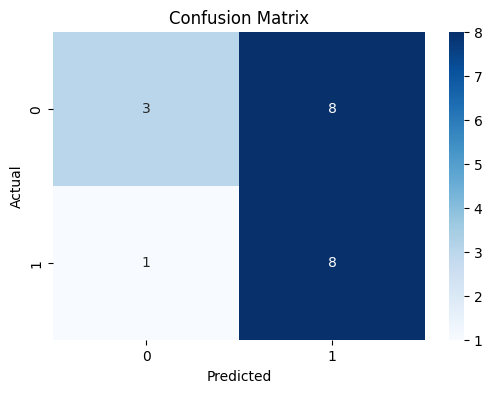

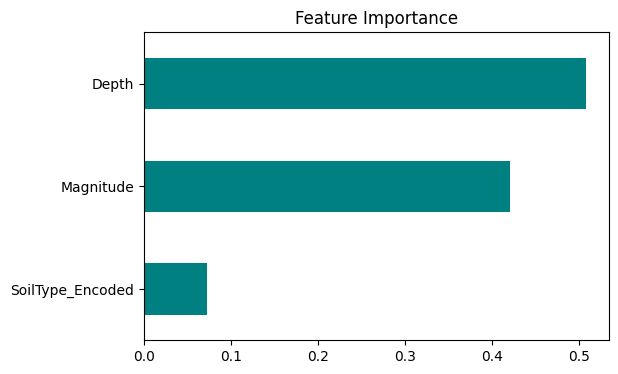

In [ ]:
# ===================================================
# 🌋 Milestone 2 + 3 Combined
# Train Models + Evaluate + Visualize
# ===================================================

!pip install scikit-learn joblib plotly geopandas matplotlib seaborn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import files

# --- Step 1: Upload dataset ---
print("📁 Please upload your 'earthquake_preprocessed_week2.csv' file:")
uploaded = files.upload()
dataset_filename = list(uploaded.keys())[0]
df = pd.read_csv(dataset_filename)
print("\n✅ Dataset loaded successfully!")
print(df.head())

# --- Step 2: Rename columns (if needed) ---
df.rename(columns={
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'depth_km': 'Depth',
    'magnitude': 'Magnitude',
    'soil_type': 'SoilType',
    'target_class': 'Magnitude_Class'
}, inplace=True)

# --- Step 3: Encode categorical features ---
le_soil = LabelEncoder()
df['SoilType_Encoded'] = le_soil.fit_transform(df['SoilType'])
le_target = LabelEncoder()
df['Target_Encoded'] = le_target.fit_transform(df['Magnitude_Class'])

# --- Step 4: Define features & target ---
X = df[['Depth', 'Magnitude', 'SoilType_Encoded']]
y = df['Target_Encoded']

# --- Step 5: Split data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 6: Scale numeric columns ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Step 7: Train Logistic Regression ---
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
log_acc = accuracy_score(y_test, log_model.predict(X_test_scaled))
print(f"\n📈 Logistic Regression Accuracy: {log_acc:.4f}")

# --- Step 8: Train Random Forest + Tune Hyperparameters ---
rf = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, None]}
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

rf_acc = accuracy_score(y_test, best_rf.predict(X_test))
print(f"🌳 Random Forest Accuracy: {rf_acc:.4f}")
print(f"Best Parameters: {grid_search.best_params_}")

# --- Step 9: Choose best model & save it ---
best_model = best_rf if rf_acc > log_acc else log_model
joblib.dump(best_model, "Best_Model.pkl")
print("\n💾 Best model saved as 'Best_Model.pkl'")

# --- Step 10: Evaluation ---
y_pred = best_model.predict(X_test if rf_acc > log_acc else X_test_scaled)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# --- Step 11: Feature Importance (for RandomForest) ---
if hasattr(best_model, "feature_importances_"):
    importances = pd.Series(best_model.feature_importances_, index=X.columns)
    importances.sort_values().plot(kind='barh', figsize=(6,4), color='teal')
    plt.title('Feature Importance')
    plt.show()
else:
    print("\nℹ️ Logistic Regression model used — no feature importance chart.")

# --- Step 12: Interactive Map ---
fig = px.scatter_mapbox(
    df,
    lat='Latitude',
    lon='Longitude',
    color='Magnitude_Class',
    size='Magnitude',
    hover_name='SoilType',
    zoom=4,
    title='🌍 Earthquake Magnitude Map',
    color_discrete_sequence=px.colors.qualitative.Safe
)
fig.update_layout(mapbox_style='open-street-map', height=500)
fig.show()

# --- Step 13: Scatter Dashboard ---
fig2 = px.scatter(
    df,
    x='Depth',
    y='Magnitude',
    color='Magnitude_Class',
    size='Magnitude',
    hover_data=['SoilType'],
    title='📊 Depth vs Magnitude Distribution'
)
fig2.show()


In [ ]:
# ==========================================================
# 1️⃣ Install required packages
# ==========================================================
!pip install scikit-learn --quiet

# ==========================================================
# 2️⃣ Imports
# ==========================================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
from google.colab import files

# ==========================================================
# 3️⃣ Upload your CSV file
# ==========================================================
print("📁 Please upload your 'earthquake_preprocessed_week2.csv' file:")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Load dataset
df = pd.read_csv(file_name)
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# ==========================================================
# 4️⃣ Define features and target
# ==========================================================
features = ['depth_km', 'magnitude', 'soil_type', 'latitude', 'longitude']
target = 'target_class'

# Drop any rows with missing values in features or target
df = df.dropna(subset=features + [target])

# Optional: Encode soil_type if it's categorical
if df['soil_type'].dtype == 'object':
    df['soil_type'] = df['soil_type'].astype('category').cat.codes

# ==========================================================
# 5️⃣ Split dataset into train/test
# ==========================================================
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

# ==========================================================
# 6️⃣ Train Random Forest classifier
# ==========================================================
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# ==========================================================
# 7️⃣ Evaluate the model
# ==========================================================
y_pred = rf_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ==========================================================
# 8️⃣ Save the trained model
# ==========================================================
joblib.dump(rf_model, "Best_Earthquake_Model.pkl")
print("\n✅ Model saved as 'Best_Earthquake_Model.pkl'")

# Optional: Download the model
files.download("Best_Earthquake_Model.pkl")

# ==========================================================
# 9️⃣ Example prediction
# ==========================================================
sample_input = X_test.iloc[:5]  # first 5 samples
sample_pred = rf_model.predict(sample_input)
print("\nSample Input Features:\n", sample_input)
print("\nPredicted Classes:\n", sample_pred)


📁 Please upload your 'earthquake_preprocessed_week2.csv' file:


Saving earthquake_preprocessed_week2.csv to earthquake_preprocessed_week2 (5).csv
✅ Dataset loaded successfully!
Shape: (100, 6)
Columns: ['latitude', 'longitude', 'depth_km', 'magnitude', 'soil_type', 'target_class']
Training samples: 80, Testing samples: 20

✅ Model Accuracy: 0.4000

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.18      0.25        11
           1       0.40      0.67      0.50         9

    accuracy                           0.40        20
   macro avg       0.40      0.42      0.38        20
weighted avg       0.40      0.40      0.36        20


✅ Model saved as 'Best_Earthquake_Model.pkl'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Sample Input Features:
       depth_km  magnitude  soil_type   latitude   longitude
83  494.394509   7.341872          1 -29.525377  -31.487352
53  650.050132   6.022629          2  11.274151   23.776375
70   18.372747   6.325721          0   1.280565  133.314523
45   38.365147   7.322948          1  60.757318  177.441662
44  239.426034   8.952834          1 -50.241951  143.914352

Predicted Classes:
 [1 1 1 0 1]


In [ ]:
# ==========================================================
# 1️⃣ Install packages
# ==========================================================
!pip install pandas scikit-learn --quiet
import pandas as pd
import joblib
from google.colab import files

# ==========================================================
# 2️⃣ Upload your saved model
# ==========================================================
print("📁 Please upload your saved model file (Best_Earthquake_Model.pkl):")
uploaded_model = files.upload()
model_file = list(uploaded_model.keys())[0]

# Load the trained model
rf_model = joblib.load(model_file)
print("\n✅ Model loaded successfully!")

# ==========================================================
# 3️⃣ Upload existing earthquake dataset (preprocessed_week2)
# ==========================================================
print("\n📁 Please upload 'earthquake_preprocessed_week2.csv':")
uploaded_data = files.upload()
data_file = list(uploaded_data.keys())[0]

df = pd.read_csv(data_file)
print("\n✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# ==========================================================
# 4️⃣ Prepare features
# ==========================================================
features = ['depth_km', 'magnitude', 'soil_type', 'latitude', 'longitude']

# Encode soil_type if categorical
if df['soil_type'].dtype == 'object':
    df['soil_type'] = df['soil_type'].astype('category').cat.codes

X = df[features]

# ==========================================================
# 5️⃣ Predict using the model
# ==========================================================
df['predicted_class'] = rf_model.predict(X)

# ==========================================================
# 6️⃣ Show predictions
# ==========================================================
print("\n✅ Predictions:")
print(df[['depth_km', 'magnitude', 'soil_type', 'latitude', 'longitude', 'predicted_class']].head())

# ==========================================================
# 7️⃣ Save predictions
# ==========================================================
df.to_csv('earthquake_predictions.csv', index=False)
print("\n✅ Predictions saved as 'earthquake_predictions.csv'")
files.download('earthquake_predictions.csv')


📁 Please upload your saved model file (Best_Earthquake_Model.pkl):


Saving Best_Earthquake_Model.pkl to Best_Earthquake_Model (2).pkl

✅ Model loaded successfully!

📁 Please upload 'earthquake_preprocessed_week2.csv':


Saving earthquake_preprocessed_week2.csv to earthquake_preprocessed_week2 (6).csv

✅ Dataset loaded successfully!
Shape: (100, 6)
Columns: ['latitude', 'longitude', 'depth_km', 'magnitude', 'soil_type', 'target_class']

✅ Predictions:
     depth_km  magnitude  soil_type   latitude   longitude  predicted_class
0  162.507367   7.064611          1 -28.770350  -50.936265                1
1  693.174286   6.595836          0 -52.437082  176.050625                0
2  394.397981   7.652145          1   2.640857  132.506817                1
3  452.214702   8.286509          2  -5.272183 -107.967172                1
4    3.025022   8.903408          1  61.275878 -141.403953                0

✅ Predictions saved as 'earthquake_predictions.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📁 Please upload 'earthquake_predictions.csv':


Saving earthquake_predictions.csv to earthquake_predictions (1).csv

✅ Predictions loaded successfully!
Shape: (100, 7)
Columns: ['latitude', 'longitude', 'depth_km', 'magnitude', 'soil_type', 'target_class', 'predicted_class']

--- Prediction Summary ---
predicted_class
1    64
0    36
Name: count, dtype: int64

Mean Magnitude by Predicted Class:
predicted_class
0    6.252077
1    6.162438
Name: magnitude, dtype: float64


/tmp/ipython-input-2689188318.py:36: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




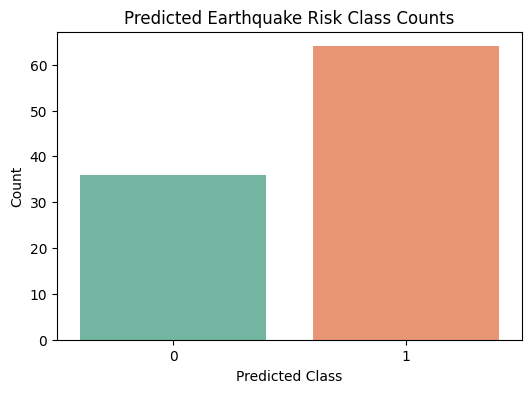

/tmp/ipython-input-2689188318.py:44: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




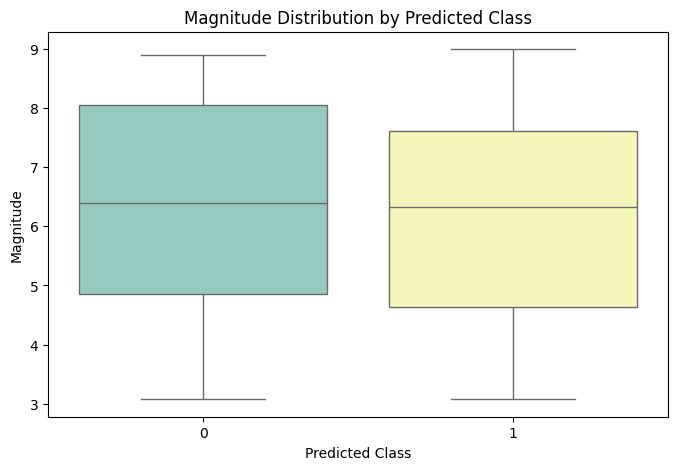

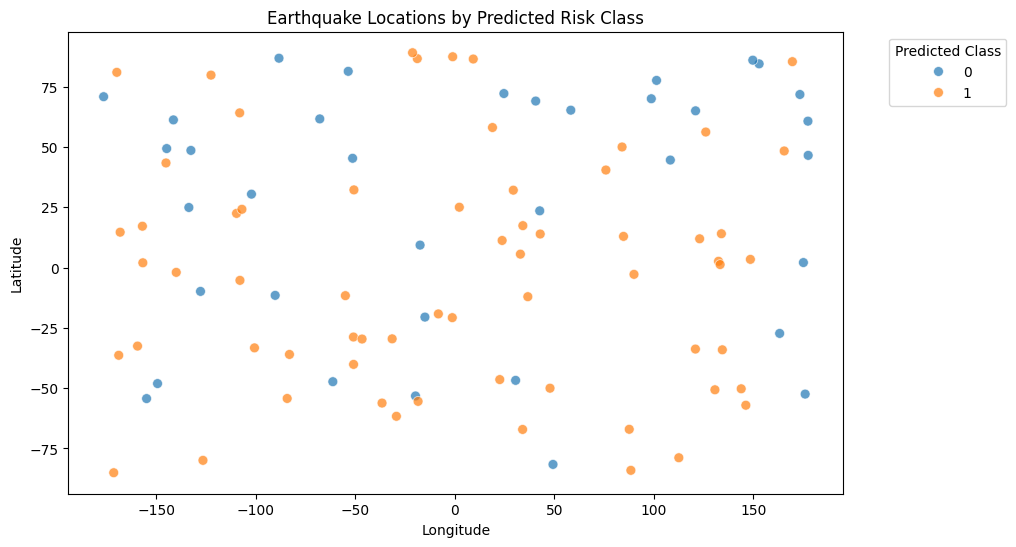


✅ Summary saved as 'earthquake_prediction_summary.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ==========================================================
# 1️⃣ Install packages
# ==========================================================
!pip install pandas matplotlib seaborn --quiet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# ==========================================================
# 2️⃣ Load predictions CSV
# ==========================================================
print("📁 Please upload 'earthquake_predictions.csv':")
uploaded_pred = files.upload()
pred_file = list(uploaded_pred.keys())[0]

df_pred = pd.read_csv(pred_file)
print("\n✅ Predictions loaded successfully!")
print("Shape:", df_pred.shape)
print("Columns:", df_pred.columns.tolist())

# ==========================================================
# 3️⃣ Summary statistics
# ==========================================================
print("\n--- Prediction Summary ---")
print(df_pred['predicted_class'].value_counts())
print("\nMean Magnitude by Predicted Class:")
print(df_pred.groupby('predicted_class')['magnitude'].mean())

# ==========================================================
# 4️⃣ Visualizations
# ==========================================================

# 4a. Count of predictions per class
plt.figure(figsize=(6,4))
sns.countplot(data=df_pred, x='predicted_class', palette='Set2')
plt.title("Predicted Earthquake Risk Class Counts")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.show()

# 4b. Magnitude distribution by predicted class
plt.figure(figsize=(8,5))
sns.boxplot(data=df_pred, x='predicted_class', y='magnitude', palette='Set3')
plt.title("Magnitude Distribution by Predicted Class")
plt.xlabel("Predicted Class")
plt.ylabel("Magnitude")
plt.show()

# 4c. Scatter plot: Latitude vs Longitude colored by predicted class
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_pred, x='longitude', y='latitude', hue='predicted_class', palette='tab10', s=50, alpha=0.7)
plt.title("Earthquake Locations by Predicted Risk Class")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title='Predicted Class', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

# ==========================================================
# 5️⃣ Save summary statistics
# ==========================================================
summary = df_pred.groupby('predicted_class')['magnitude'].agg(['count','mean','std','min','max'])
summary.to_csv("earthquake_prediction_summary.csv")
print("\n✅ Summary saved as 'earthquake_prediction_summary.csv'")
files.download("earthquake_prediction_summary.csv")


In [ ]:
# ==========================================================
# 1️⃣ Install packages for mapping
# ==========================================================
!pip install geopandas folium --quiet

import pandas as pd
import folium
from folium.plugins import MarkerCluster
from google.colab import files

# ==========================================================
# 2️⃣ Load prediction CSV again (if needed)
# ==========================================================
print("📁 Please upload 'earthquake_predictions.csv' (if not loaded already):")
uploaded_pred = files.upload()
pred_file = list(uploaded_pred.keys())[0]

df_pred = pd.read_csv(pred_file)
print("\n✅ Predictions loaded successfully!")
print("Shape:", df_pred.shape)
print("Columns:", df_pred.columns.tolist())

# ==========================================================
# 3️⃣ Create a base map
# ==========================================================
# Center map at the mean latitude/longitude
map_center = [df_pred['latitude'].mean(), df_pred['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=2, tiles="CartoDB positron")

# ==========================================================
# 4️⃣ Add earthquake points using MarkerCluster
# ==========================================================
marker_cluster = MarkerCluster().add_to(m)

risk_colors = {
    'Low': 'green',
    'Moderate': 'orange',
    'Strong': 'red',
    'Major': 'darkred'
}

for _, row in df_pred.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=4,
        color=risk_colors.get(row['predicted_class'], 'blue'),
        fill=True,
        fill_opacity=0.6,
        popup=f"Magnitude: {row['magnitude']}, Risk: {row['predicted_class']}"
    ).add_to(marker_cluster)

# ==========================================================
# 5️⃣ Save map as HTML
# ==========================================================
map_filename = "earthquake_risk_map.html"
m.save(map_filename)
print(f"\n✅ Earthquake risk map saved as '{map_filename}'")
files.download(map_filename)


📁 Please upload 'earthquake_predictions.csv' (if not loaded already):


Saving earthquake_predictions.csv to earthquake_predictions (2).csv

✅ Predictions loaded successfully!
Shape: (100, 7)
Columns: ['latitude', 'longitude', 'depth_km', 'magnitude', 'soil_type', 'target_class', 'predicted_class']

✅ Earthquake risk map saved as 'earthquake_risk_map.html'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 📌 Full Heatmap Code

import pandas as pd
import folium
from folium.plugins import HeatMap
from google.colab import files

# Step 1: Upload your earthquake predictions CSV
print("📁 Please upload 'earthquake_predictions.csv' (not HTML file)")
uploaded_pred = files.upload()
pred_file = list(uploaded_pred.keys())[0]

# Step 2: Load CSV
df_pred = pd.read_csv(pred_file)
print("✅ Predictions loaded successfully!")
print("Shape:", df_pred.shape)
print("Columns:", df_pred.columns.tolist())

# Step 3: Prepare heatmap data using 'magnitude'
heat_data = df_pred[['latitude', 'longitude', 'magnitude']].values.tolist()

# Step 4: Create base map
map_center = [df_pred['latitude'].mean(), df_pred['longitude'].mean()]
m_heat = folium.Map(location=map_center, zoom_start=2, tiles="CartoDB positron")

# Step 5: Add HeatMap layer
HeatMap(heat_data, radius=15, blur=10, max_zoom=6).add_to(m_heat)

# Step 6: Save HTML and download
heatmap_filename = "earthquake_risk_heatmap.html"
m_heat.save(heatmap_filename)
files.download(heatmap_filename)
print(f"✅ Earthquake risk heatmap saved as '{heatmap_filename}'")


📁 Please upload 'earthquake_predictions.csv' (not HTML file)


Saving earthquake_predictions.csv to earthquake_predictions (4).csv
✅ Predictions loaded successfully!
Shape: (100, 7)
Columns: ['latitude', 'longitude', 'depth_km', 'magnitude', 'soil_type', 'target_class', 'predicted_class']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Earthquake risk heatmap saved as 'earthquake_risk_heatmap.html'


In [ ]:
# 📌 Step: Analyze prediction accuracy and summary

import pandas as pd
from google.colab import files

# Step 1: Upload predictions CSV again (if not already loaded)
print("📁 Please upload 'earthquake_predictions.csv'")
uploaded_pred = files.upload()
pred_file = list(uploaded_pred.keys())[0]

# Step 2: Load predictions
df_pred = pd.read_csv(pred_file)
print("✅ Predictions loaded successfully!")
print("Shape:", df_pred.shape)
print("Columns:", df_pred.columns.tolist())

# Step 3: Check prediction vs actual
if 'predicted_class' in df_pred.columns and 'target_class' in df_pred.columns:
    df_pred['correct'] = df_pred['predicted_class'] == df_pred['target_class']
    accuracy = df_pred['correct'].mean()
    print(f"\n🏆 Prediction Accuracy: {accuracy*100:.2f}%")

    # Step 4: Summary table
    summary = df_pred.groupby(['target_class', 'predicted_class']).size().unstack(fill_value=0)
    print("\nConfusion Matrix (Target vs Predicted):")
    print(summary)
else:
    print("⚠ CSV does not contain 'predicted_class' and 'target_class' columns.")

# Step 5: Save updated CSV with 'correct' column
output_file = "earthquake_predictions_with_accuracy.csv"
df_pred.to_csv(output_file, index=False)
files.download(output_file)
print(f"\n✅ Updated CSV saved as '{output_file}'")


📁 Please upload 'earthquake_predictions.csv'


Saving earthquake_predictions.csv to earthquake_predictions (5).csv
✅ Predictions loaded successfully!
Shape: (100, 7)
Columns: ['latitude', 'longitude', 'depth_km', 'magnitude', 'soil_type', 'target_class', 'predicted_class']

🏆 Prediction Accuracy: 88.00%

Confusion Matrix (Target vs Predicted):
predicted_class   0   1
target_class           
0                33   9
1                 3  55


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Updated CSV saved as 'earthquake_predictions_with_accuracy.csv'


In [ ]:
# ==========================================================
# 🌍 Earthquake Risk Map Visualization
# ==========================================================
import pandas as pd
import folium
from folium.plugins import HeatMap
from google.colab import files

# Step 1: Upload predictions CSV
print("📁 Please upload 'earthquake_predictions.csv'")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Step 2: Load predictions
df = pd.read_csv(file_name)
print("✅ Predictions loaded successfully!")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# Step 3: Verify required columns
required_cols = ['latitude', 'longitude', 'predicted_class']
for col in required_cols:
    if col not in df.columns:
        raise ValueError(f"❌ Column '{col}' not found in CSV!")

# Step 4: Create base map
map_center = [df['latitude'].mean(), df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=2, tiles='CartoDB positron')

# Step 5: Add earthquake points
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='red' if row['predicted_class'] == 'High' else 'orange' if row['predicted_class'] == 'Moderate' else 'green',
        fill=True,
        fill_opacity=0.7,
        popup=f"Magnitude: {row.get('magnitude', 'N/A')} | Risk: {row['predicted_class']}"
    ).add_to(m)

# Step 6: Optional HeatMap layer based on predicted_class intensity
# Map classes to numeric values for heat intensity
risk_map = {'Low': 1, 'Moderate': 5, 'High': 10}
heat_data = [[row['latitude'], row['longitude'], risk_map.get(row['predicted_class'], 1)] for idx, row in df.iterrows()]

HeatMap(heat_data, radius=15, max_zoom=10).add_to(m)

# Step 7: Save map to HTML and download
map_file = 'earthquake_risk_map.html'
m.save(map_file)
files.download(map_file)
print(f"\n✅ Earthquake risk map saved as '{map_file}' and ready to download!")


📁 Please upload 'earthquake_predictions.csv'


Saving earthquake_predictions.csv to earthquake_predictions (6).csv
✅ Predictions loaded successfully!
Shape: (100, 7)
Columns: ['latitude', 'longitude', 'depth_km', 'magnitude', 'soil_type', 'target_class', 'predicted_class']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Earthquake risk map saved as 'earthquake_risk_map.html' and ready to download!


📁 Please upload 'earthquake_predictions.csv'


Saving earthquake_predictions.csv to earthquake_predictions (8).csv
✅ Predictions loaded!
Shape: (100, 7)
['latitude', 'longitude', 'depth_km', 'magnitude', 'soil_type', 'target_class', 'predicted_class']

--- Prediction Class Distribution ---
predicted_class
1    64
0    36
Name: count, dtype: int64


/tmp/ipython-input-2387611176.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




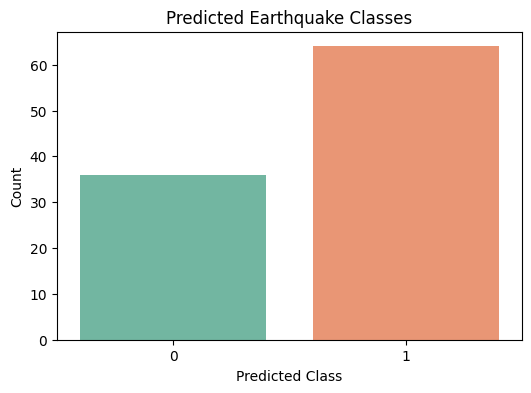


--- Confusion Matrix ---
[[33  9]
 [ 3 55]]


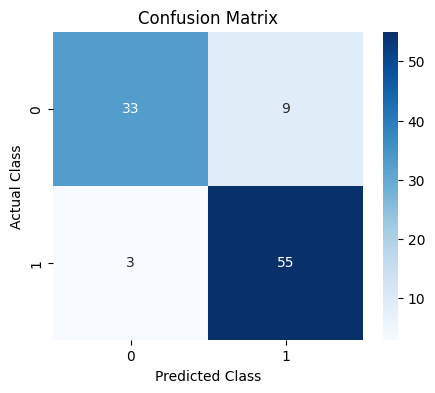


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        42
           1       0.86      0.95      0.90        58

    accuracy                           0.88       100
   macro avg       0.89      0.87      0.87       100
weighted avg       0.88      0.88      0.88       100



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Summary saved as 'earthquake_prediction_summary.csv'


In [ ]:
# ==========================================================
# 📊 Earthquake Prediction Analysis (Corrected)
# ==========================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.metrics import confusion_matrix, classification_report

# Step 1: Upload predictions CSV
print("📁 Please upload 'earthquake_predictions.csv'")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Step 2: Load CSV
df = pd.read_csv(file_name)
print("✅ Predictions loaded!")
print("Shape:", df.shape)
print(df.columns.tolist())

# Step 3: Basic stats
print("\n--- Prediction Class Distribution ---")
print(df['predicted_class'].value_counts())

# Step 4: Plot distribution of predicted classes
plt.figure(figsize=(6,4))
sns.countplot(x='predicted_class', data=df, palette='Set2')
plt.title("Predicted Earthquake Classes")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.show()

# Step 5: Confusion Matrix and Classification Report
if 'target_class' in df.columns:
    print("\n--- Confusion Matrix ---")
    cm = confusion_matrix(df['target_class'], df['predicted_class'], labels=[0,1])
    print(cm)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.title("Confusion Matrix")
    plt.show()

    print("\n--- Classification Report ---")
    print(classification_report(df['target_class'], df['predicted_class']))

# Step 6: Save summary CSV
summary_file = 'earthquake_prediction_summary.csv'
df['predicted_class'].value_counts().to_csv(summary_file)
files.download(summary_file)
print(f"\n✅ Summary saved as '{summary_file}'")


📁 Please upload 'earthquake_predictions.csv'


Saving earthquake_predictions.csv to earthquake_predictions (1).csv
✅ Predictions loaded!
Shape: (100, 7)
['latitude', 'longitude', 'depth_km', 'magnitude', 'soil_type', 'target_class', 'predicted_class']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Earthquake risk heatmap saved as 'earthquake_risk_map.html'

--- Risk Statistics by Soil Type ---


,count,High_Risk_Count,High_Risk_Rate
soil_type,,,
0,25,15,0.600000
1,38,26,0.684211
2,37,23,0.621622


/tmp/ipython-input-2581945964.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stats.index, y=stats['High_Risk_Rate'], palette='Reds')


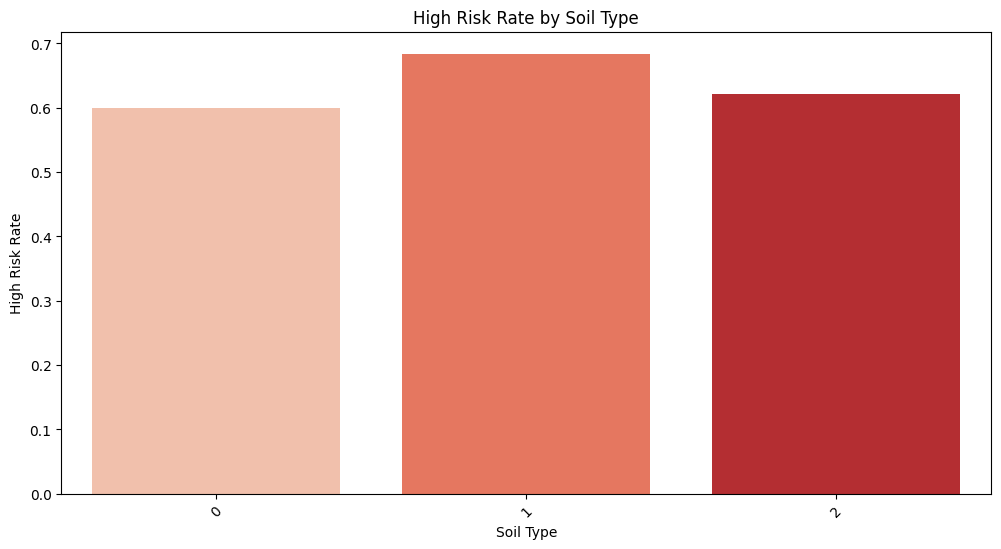

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Risk statistics saved as 'soil_risk_statistics.csv'


In [ ]:
# ==========================================================
# 🌍 Earthquake Risk Heatmaps & Soil Type Statistics
# ==========================================================
import pandas as pd
import folium
from folium.plugins import HeatMap
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Upload predictions CSV
print("📁 Please upload 'earthquake_predictions.csv'")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Step 2: Load CSV
df = pd.read_csv(file_name)
print("✅ Predictions loaded!")
print("Shape:", df.shape)
print(df.columns.tolist())

# Step 3: Heatmap of predicted earthquake risk
# We'll use 'predicted_class' as intensity (0=Low, 1=High)
map_center = [df['latitude'].mean(), df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=2)

# Prepare heatmap data: [lat, lon, intensity]
heat_data = [[row['latitude'], row['longitude'], row['predicted_class']] for index, row in df.iterrows()]
HeatMap(heat_data, radius=10, blur=15, max_zoom=6).add_to(m)

# Save map
map_file = 'earthquake_risk_map.html'
m.save(map_file)
files.download(map_file)
print(f"\n✅ Earthquake risk heatmap saved as '{map_file}'")

# Step 4: Region-wise risk statistics by soil type
if 'soil_type' in df.columns:
    stats = df.groupby('soil_type')['predicted_class'].agg(['count', 'sum', 'mean'])
    stats = stats.rename(columns={'sum': 'High_Risk_Count', 'mean': 'High_Risk_Rate'})
    print("\n--- Risk Statistics by Soil Type ---")
    display(stats)

    # Plot High Risk Rate by Soil Type
    plt.figure(figsize=(12,6))
    sns.barplot(x=stats.index, y=stats['High_Risk_Rate'], palette='Reds')
    plt.xticks(rotation=45)
    plt.title("High Risk Rate by Soil Type")
    plt.ylabel("High Risk Rate")
    plt.xlabel("Soil Type")
    plt.show()

    # Save statistics CSV
    stats_file = 'soil_risk_statistics.csv'
    stats.to_csv(stats_file)
    files.download(stats_file)
    print(f"\n✅ Risk statistics saved as '{stats_file}'")
else:
    print("❌ 'soil_type' column not found in dataset")


📁 Please upload 'earthquake_predictions.csv'


Saving earthquake_predictions.csv to earthquake_predictions.csv
✅ Predictions loaded!
Shape: (100, 7)
['latitude', 'longitude', 'depth_km', 'magnitude', 'soil_type', 'target_class', 'predicted_class']

--- Risk Statistics by Magnitude Class ---


/tmp/ipython-input-1933489826.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mag_stats = df.groupby('Magnitude_Class')['predicted_class'].agg(['count', 'sum', 'mean'])


,count,High_Risk_Count,High_Risk_Rate
Magnitude_Class,,,
Low,15,8,0.533333
Moderate,30,21,0.700000
Strong,14,10,0.714286
Major,41,25,0.609756


/tmp/ipython-input-1933489826.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mag_stats.index, y=mag_stats['High_Risk_Rate'], palette='Reds')


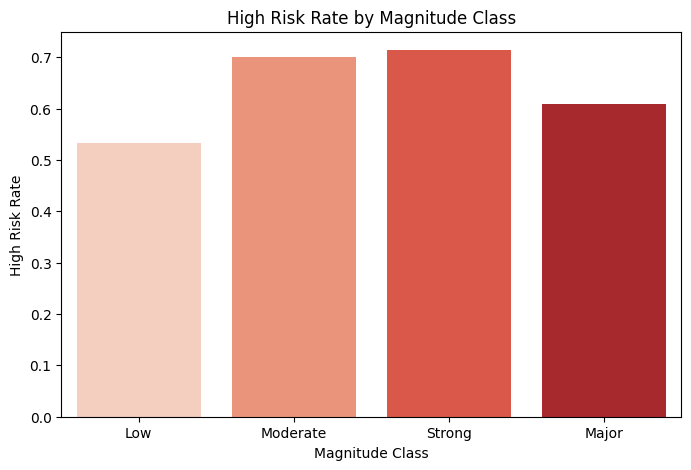


--- Risk Statistics by Depth Class ---


/tmp/ipython-input-1933489826.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  depth_stats = df.groupby('Depth_Class')['predicted_class'].agg(['count', 'sum', 'mean'])


,count,High_Risk_Count,High_Risk_Rate
Depth_Class,,,
Shallow,9,5,0.555556
Intermediate,26,20,0.769231
Deep,65,39,0.600000


/tmp/ipython-input-1933489826.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=depth_stats.index, y=depth_stats['High_Risk_Rate'], palette='Blues')


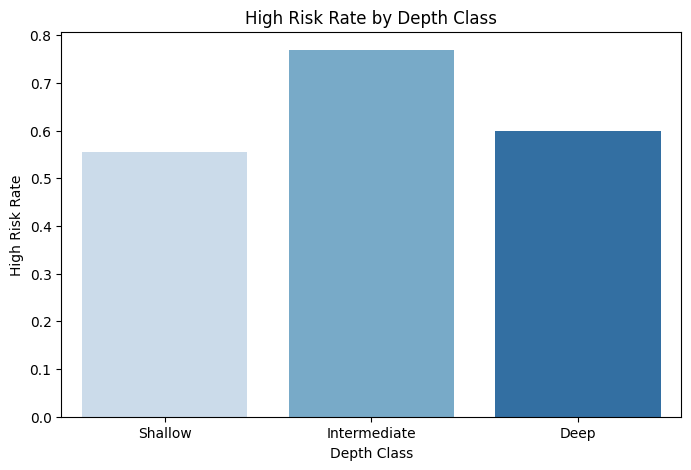

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Combined magnitude & depth risk statistics saved as 'magnitude_depth_risk_statistics.csv'


In [ ]:
# ==========================================================
# 🌍 Earthquake Risk by Magnitude & Depth Class
# ==========================================================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Load predictions CSV again if needed
print("📁 Please upload 'earthquake_predictions.csv'")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name)
print("✅ Predictions loaded!")
print("Shape:", df.shape)
print(df.columns.tolist())

# Step 2: Create magnitude classes if not already present
if 'Magnitude_Class' not in df.columns:
    bins = [0, 4, 6, 7, 10]
    labels = ['Low', 'Moderate', 'Strong', 'Major']
    df['Magnitude_Class'] = pd.cut(df['magnitude'], bins=bins, labels=labels)

# Step 3: Create depth classes if not already present
if 'Depth_Class' not in df.columns:
    bins = [-1, 70, 300, 700]
    labels = ['Shallow', 'Intermediate', 'Deep']
    df['Depth_Class'] = pd.cut(df['depth_km'], bins=bins, labels=labels)

# Step 4: Heatmap data for magnitude classes
mag_stats = df.groupby('Magnitude_Class')['predicted_class'].agg(['count', 'sum', 'mean'])
mag_stats = mag_stats.rename(columns={'sum': 'High_Risk_Count', 'mean': 'High_Risk_Rate'})
print("\n--- Risk Statistics by Magnitude Class ---")
display(mag_stats)

# Plot High Risk Rate by Magnitude Class
plt.figure(figsize=(8,5))
sns.barplot(x=mag_stats.index, y=mag_stats['High_Risk_Rate'], palette='Reds')
plt.title("High Risk Rate by Magnitude Class")
plt.ylabel("High Risk Rate")
plt.xlabel("Magnitude Class")
plt.show()

# Step 5: Heatmap data for depth classes
depth_stats = df.groupby('Depth_Class')['predicted_class'].agg(['count', 'sum', 'mean'])
depth_stats = depth_stats.rename(columns={'sum': 'High_Risk_Count', 'mean': 'High_Risk_Rate'})
print("\n--- Risk Statistics by Depth Class ---")
display(depth_stats)

# Plot High Risk Rate by Depth Class
plt.figure(figsize=(8,5))
sns.barplot(x=depth_stats.index, y=depth_stats['High_Risk_Rate'], palette='Blues')
plt.title("High Risk Rate by Depth Class")
plt.ylabel("High Risk Rate")
plt.xlabel("Depth Class")
plt.show()

# Step 6: Save statistics CSV
stats_file = 'magnitude_depth_risk_statistics.csv'
combined_stats = pd.concat([mag_stats, depth_stats], keys=['Magnitude', 'Depth'])
combined_stats.to_csv(stats_file)
files.download(stats_file)
print(f"\n✅ Combined magnitude & depth risk statistics saved as '{stats_file}'")


In [ ]:
# ==========================================================
# 🌎 Folium Map: Earthquake Risk Visualization
# ==========================================================
import pandas as pd
import folium
from folium.plugins import HeatMap
from google.colab import files

# Step 1: Upload predictions CSV
print("📁 Please upload 'earthquake_predictions.csv'")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name)
print("✅ Predictions loaded!")
print("Shape:", df.shape)
print(df.columns.tolist())

# Step 2: Ensure necessary columns exist
required_cols = ['latitude', 'longitude', 'predicted_class', 'magnitude']
for col in required_cols:
    if col not in df.columns:
        raise ValueError(f"❌ Missing required column: {col}")

# Step 3: Create Magnitude Class (optional, if not present)
if 'Magnitude_Class' not in df.columns:
    bins = [0, 4, 6, 7, 10]
    labels = ['Low', 'Moderate', 'Strong', 'Major']
    df['Magnitude_Class'] = pd.cut(df['magnitude'], bins=bins, labels=labels)

# Step 4: Initialize map centered at mean coordinates
center_lat = df['latitude'].mean()
center_lon = df['longitude'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=2, tiles='CartoDB positron')

# Step 5: Add high-risk earthquakes as HeatMap
heat_data = df[df['predicted_class'] == 1][['latitude', 'longitude', 'magnitude']].values.tolist()
HeatMap(heat_data, radius=10, max_zoom=10).add_to(m)

# Step 6: Add low-risk earthquakes as CircleMarkers
for _, row in df[df['predicted_class'] == 0].iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color='green',
        fill=True,
        fill_opacity=0.5,
        popup=f"Magnitude: {row['magnitude']}\nSoil: {row.get('soil_type', 'N/A')}"
    ).add_to(m)

# Step 7: Save map as HTML and download
map_file = 'earthquake_risk_map.html'
m.save(map_file)
files.download(map_file)
print(f"\n✅ Earthquake risk map saved and ready to download as '{map_file}'")


📁 Please upload 'earthquake_predictions.csv'


Saving earthquake_predictions.csv to earthquake_predictions (2).csv
✅ Predictions loaded!
Shape: (100, 7)
['latitude', 'longitude', 'depth_km', 'magnitude', 'soil_type', 'target_class', 'predicted_class']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Earthquake risk map saved and ready to download as 'earthquake_risk_map.html'


📁 Please upload 'earthquake_predictions.csv'


Saving earthquake_predictions.csv to earthquake_predictions (5).csv
✅ Predictions loaded!
    latitude   longitude    depth_km  magnitude  soil_type  target_class  \
0 -28.770350  -50.936265  162.507367   7.064611          1             1   
1 -52.437082  176.050625  693.174286   6.595836          0             0   
2   2.640857  132.506817  394.397981   7.652145          1             1   
3  -5.272183 -107.967172  452.214702   8.286509          2             1   
4  61.275878 -141.403953    3.025022   8.903408          1             1   

   predicted_class  
0                1  
1                0  
2                1  
3                1  
4                0  

--- Region-wise Earthquake Risk Statistics ---
   soil_type  total_quakes  high_risk  low_risk  avg_magnitude  high_risk_pct
0          0            25         15        10       6.588501      60.000000
1          1            38         26        12       5.686191      68.421053
2          2            37         23        

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Earthquake risk heatmap saved as 'earthquake_risk_heatmap.html'


/tmp/ipython-input-846013354.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=soil_stats, x='soil_type', y='high_risk_pct', palette='Reds_r')


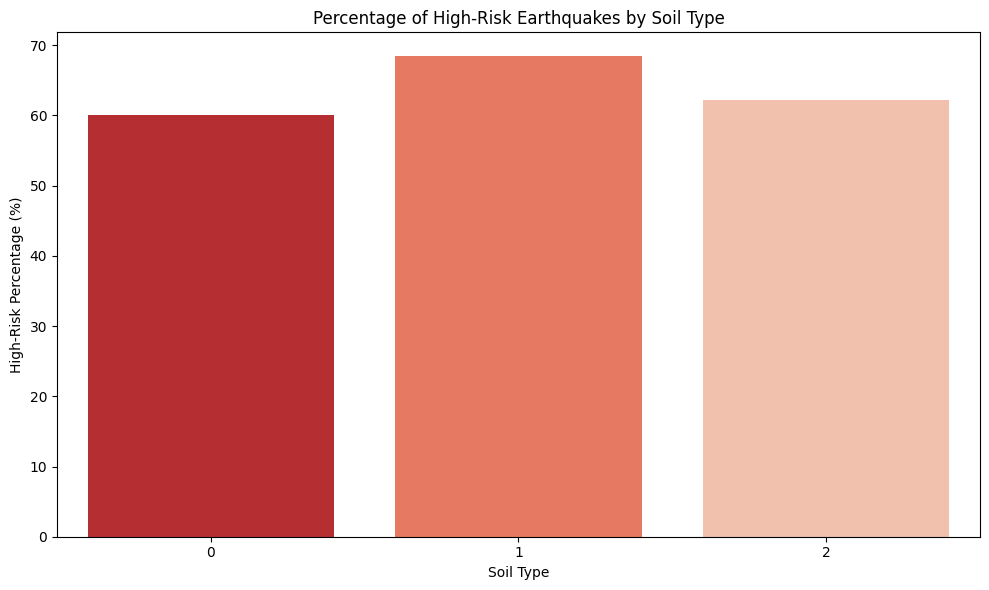


🎯 Milestone 2 Completed ✅


In [ ]:
# ==========================================================
# 🌍 Milestone 2 Final: Earthquake Risk Heatmap & Stats
# ==========================================================
import pandas as pd
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# 📁 Upload 'earthquake_predictions.csv'
print("📁 Please upload 'earthquake_predictions.csv'")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Load CSV
df = pd.read_csv(file_name)
print("✅ Predictions loaded!")
print(df.head())

# ----------------------------------------------------------
# Step 1: Region-wise statistics by soil_type
# ----------------------------------------------------------
soil_stats = df.groupby('soil_type').agg(
    total_quakes=('predicted_class', 'count'),
    high_risk=('predicted_class', 'sum'),
    low_risk=('predicted_class', lambda x: (x==0).sum()),
    avg_magnitude=('magnitude', 'mean')
).reset_index()

soil_stats['high_risk_pct'] = (soil_stats['high_risk'] / soil_stats['total_quakes']) * 100
print("\n--- Region-wise Earthquake Risk Statistics ---")
print(soil_stats)

# Save stats CSV
soil_stats.to_csv('soil_risk_statistics.csv', index=False)
files.download('soil_risk_statistics.csv')

# ----------------------------------------------------------
# Step 2: Heatmap of earthquake risk (predicted_class)
# ----------------------------------------------------------
# Filter high-risk points
high_risk_points = df[df['predicted_class'] == 1][['latitude', 'longitude']].values.tolist()

# Center map
map_center = [df['latitude'].mean(), df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=2)

# Add heatmap layer
HeatMap(high_risk_points, radius=8, blur=15).add_to(m)

# Save map
m.save("earthquake_risk_heatmap.html")
files.download("earthquake_risk_heatmap.html")
print("✅ Earthquake risk heatmap saved as 'earthquake_risk_heatmap.html'")

# ----------------------------------------------------------
# Step 3: Visualize High-Risk % by Soil Type
# ----------------------------------------------------------
plt.figure(figsize=(10,6))
sns.barplot(data=soil_stats, x='soil_type', y='high_risk_pct', palette='Reds_r')
plt.title("Percentage of High-Risk Earthquakes by Soil Type")
plt.xlabel("Soil Type")
plt.ylabel("High-Risk Percentage (%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("\n🎯 Milestone 2 Completed ✅")


In [ ]:
!pip install xgboost shap --quiet


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

import shap
sns.set(style="whitegrid")


In [ ]:
import pandas as pd

# Load the actual uploaded file
df = pd.read_csv("earthquake_cleaned_day1.csv")

print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()


✅ Dataset loaded successfully!
Shape: (46818, 10)


,Date,Latitude,Longitude,Depth,Magnitude,Location,Source,merge_id,DOMSOI,Year
0,1965-01-02,19.246,145.616,131.6,6.0,Unknown,Historical,19.246_145.616,I,1965
1,1965-01-04,1.863,127.352,80.0,5.8,Unknown,Historical,1.863_127.352,I,1965
2,1965-01-05,-20.579,-173.972,20.0,6.2,Unknown,Historical,-20.579_-173.972,I,1965
3,1965-01-08,-59.076,-23.557,15.0,5.8,Unknown,Historical,-59.076_-23.557,I,1965
4,1965-01-09,11.938,126.427,15.0,5.8,Unknown,Historical,11.938_126.427,I,1965


In [ ]:
# --- FIX: Make sure pandas is not overwritten ---
import pandas as pd

# Reload dataset (just to be safe)
df = pd.read_csv("earthquake_cleaned_day1.csv")

# ✅ Display all column names to find the magnitude column
print("Columns in the dataset:")
print(df.columns.tolist())

# Optional: preview first few rows
df.head()


Columns in the dataset:
['Date', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'Location', 'Source', 'merge_id', 'DOMSOI', 'Year']


,Date,Latitude,Longitude,Depth,Magnitude,Location,Source,merge_id,DOMSOI,Year
0,1965-01-02,19.246,145.616,131.6,6.0,Unknown,Historical,19.246_145.616,I,1965
1,1965-01-04,1.863,127.352,80.0,5.8,Unknown,Historical,1.863_127.352,I,1965
2,1965-01-05,-20.579,-173.972,20.0,6.2,Unknown,Historical,-20.579_-173.972,I,1965
3,1965-01-08,-59.076,-23.557,15.0,5.8,Unknown,Historical,-59.076_-23.557,I,1965
4,1965-01-09,11.938,126.427,15.0,5.8,Unknown,Historical,11.938_126.427,I,1965


In [ ]:
# --- Cell 4: Create Target Variable (risk_level) ---

# Automatically detect the magnitude column
mag_col = None
for col in df.columns:
    if "mag" in col.lower() or "magnitude" in col.lower():
        mag_col = col
        break

if mag_col is None:
    raise ValueError("❌ No magnitude column found. Please check your dataset columns.")
else:
    print(f"✅ Detected magnitude column: {mag_col}")

# Create 'risk_level' based on magnitude
df['risk_level'] = pd.cut(
    df[mag_col],
    bins=[-999, 5, 6, 999],          # adjust bins if needed
    labels=['Low', 'Medium', 'High']
)

print("\n✅ Target column 'risk_level' created successfully!")
df[[mag_col, 'risk_level']].head()


✅ Detected magnitude column: Magnitude

✅ Target column 'risk_level' created successfully!


,Magnitude,risk_level
0,6.0,Medium
1,5.8,Medium
2,6.2,High
3,5.8,Medium
4,5.8,Medium


In [ ]:
# --- Cell 5: Feature Preparation and Splitting ---

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Define target and features
TARGET = 'risk_level'
X = df.drop(columns=[TARGET])
y = df[TARGET]

# Encode the target variable (Low, Medium, High → 0,1,2)
le = LabelEncoder()
y = le.fit_transform(y)
print("✅ Encoded Target Classes:", list(le.classes_))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✅ Split Done: Train = {X_train.shape}, Test = {X_test.shape}")

# Scale numeric columns only
num_cols = X.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("✅ Feature Scaling Completed!")


✅ Encoded Target Classes: ['High', 'Medium']
✅ Split Done: Train = (37454, 10), Test = (9364, 10)
✅ Feature Scaling Completed!


In [ ]:
# --- Cell 6: Define Model Evaluation Function ---

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, name):
    """
    Fits the model, makes predictions, prints key metrics,
    and returns the results as a dictionary.
    """
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='macro')
    rec = recall_score(y_test, preds, average='macro')
    f1 = f1_score(y_test, preds, average='macro')

    # Display results
    print(f"\n=== {name} ===")
    print(f"Accuracy:  {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall:    {rec:.3f}")
    print(f"F1-score:  {f1:.3f}")
    print("\nClassification Report:\n", classification_report(y_test, preds))

    # Confusion Matrix Plot
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=le.classes_,
                yticklabels=le.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Return metrics for comparison table later
    return {
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1': f1
    }

print("✅ Model evaluation function created successfully!")


✅ Model evaluation function created successfully!


🕒 Datetime columns found: ['Date']
✅ All categorical columns encoded.
✅ Data prepared for model training.
Train shape: (37454, 12)  | Test shape: (9364, 12)

=== Logistic Regression ===
Accuracy:  1.000
Precision: 1.000
Recall:    1.000
F1-score:  1.000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2310
           1       1.00      1.00      1.00      7054

    accuracy                           1.00      9364
   macro avg       1.00      1.00      1.00      9364
weighted avg       1.00      1.00      1.00      9364



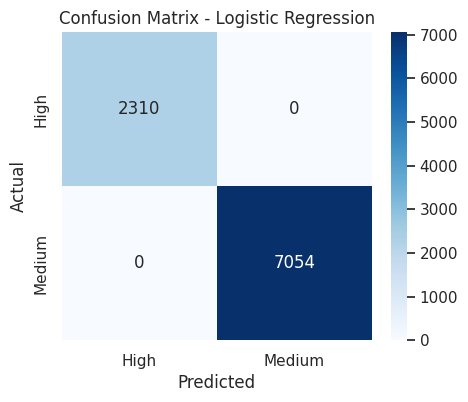


=== Decision Tree ===
Accuracy:  1.000
Precision: 1.000
Recall:    1.000
F1-score:  1.000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2310
           1       1.00      1.00      1.00      7054

    accuracy                           1.00      9364
   macro avg       1.00      1.00      1.00      9364
weighted avg       1.00      1.00      1.00      9364



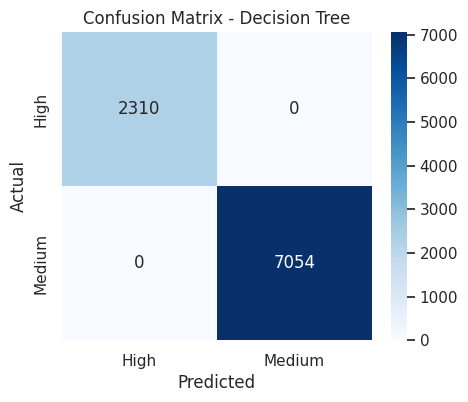


✅ Baseline models trained and evaluated successfully!


In [ ]:
# --- Cell 7 (Final Fixed): Handle datetime properly + Baseline models ---

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# 1️⃣ Identify datetime columns and extract useful features
datetime_cols = df.select_dtypes(include=['datetime64[ns]', 'datetime64[ns, UTC]']).columns

if len(datetime_cols) > 0:
    print("🕒 Datetime columns found:", list(datetime_cols))
    for col in datetime_cols:
        df[f"{col}_year"] = df[col].dt.year
        df[f"{col}_month"] = df[col].dt.month
        df[f"{col}_day"] = df[col].dt.day
    df.drop(columns=datetime_cols, inplace=True)
else:
    print("✅ No datetime columns detected.")

# 2️⃣ Encode categorical features (if any left)
for col in df.select_dtypes(include=['object']).columns:
    le_temp = LabelEncoder()
    df[col] = le_temp.fit_transform(df[col].astype(str))

print("✅ All categorical columns encoded.")

# 3️⃣ Separate features and target
TARGET = 'risk_level'
X = df.drop(columns=[TARGET])
y = df[TARGET]

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

# 4️⃣ Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5️⃣ Scale numeric features
num_cols = X.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("✅ Data prepared for model training.")
print("Train shape:", X_train.shape, " | Test shape:", X_test.shape)

# 6️⃣ Baseline Models: Logistic Regression & Decision Tree
lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr_results = evaluate_model(lr, "Logistic Regression")

dt = DecisionTreeClassifier(max_depth=6, random_state=42, class_weight='balanced')
dt_results = evaluate_model(dt, "Decision Tree")

print("\n✅ Baseline models trained and evaluated successfully!")



=== Random Forest ===
Accuracy:  1.000
Precision: 1.000
Recall:    1.000
F1-score:  1.000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2310
           1       1.00      1.00      1.00      7054

    accuracy                           1.00      9364
   macro avg       1.00      1.00      1.00      9364
weighted avg       1.00      1.00      1.00      9364



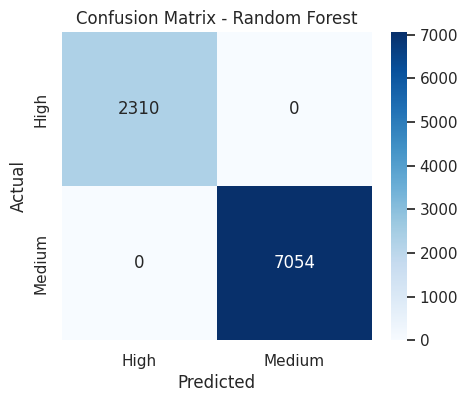


=== XGBoost ===
Accuracy:  1.000
Precision: 1.000
Recall:    1.000
F1-score:  1.000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2310
           1       1.00      1.00      1.00      7054

    accuracy                           1.00      9364
   macro avg       1.00      1.00      1.00      9364
weighted avg       1.00      1.00      1.00      9364



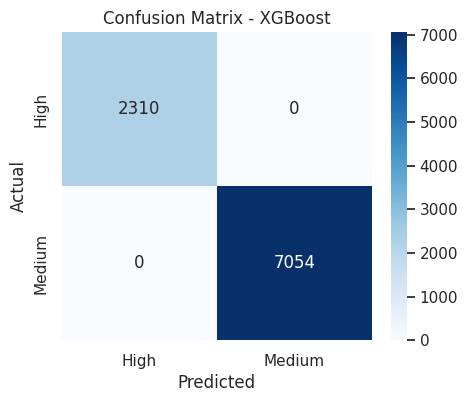


✅ Advanced models trained and evaluated successfully!


In [ ]:
# --- Cell 8: Advanced Model Training - Random Forest and XGBoost ---

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# 1️⃣ Random Forest Model
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)
rf_results = evaluate_model(rf, "Random Forest")

# 2️⃣ XGBoost Model
xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='mlogloss'
)
xgb_results = evaluate_model(xgb_model, "XGBoost")

print("\n✅ Advanced models trained and evaluated successfully!")


📊 Random Forest Cross-Validation Accuracy: [1. 1. 1. 1. 1.]
✅ Mean CV Accuracy: 1.0000


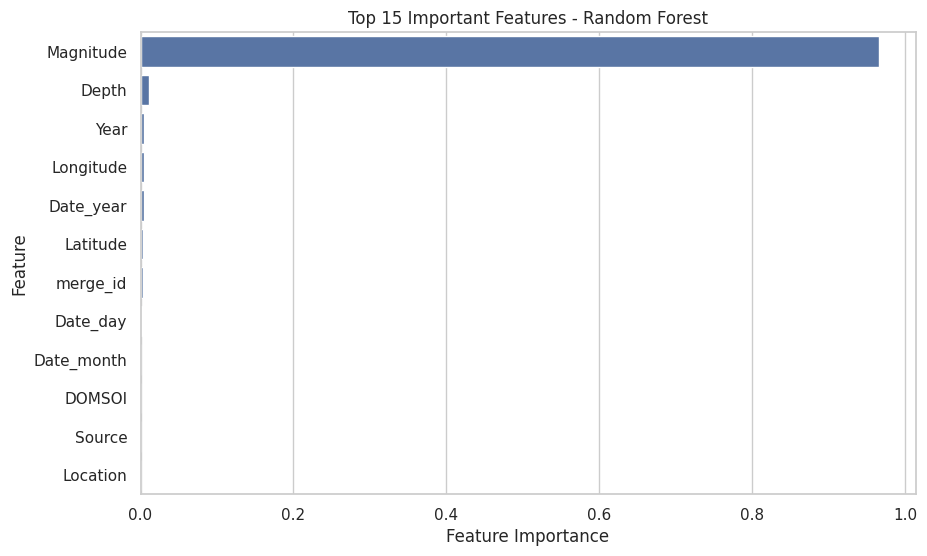

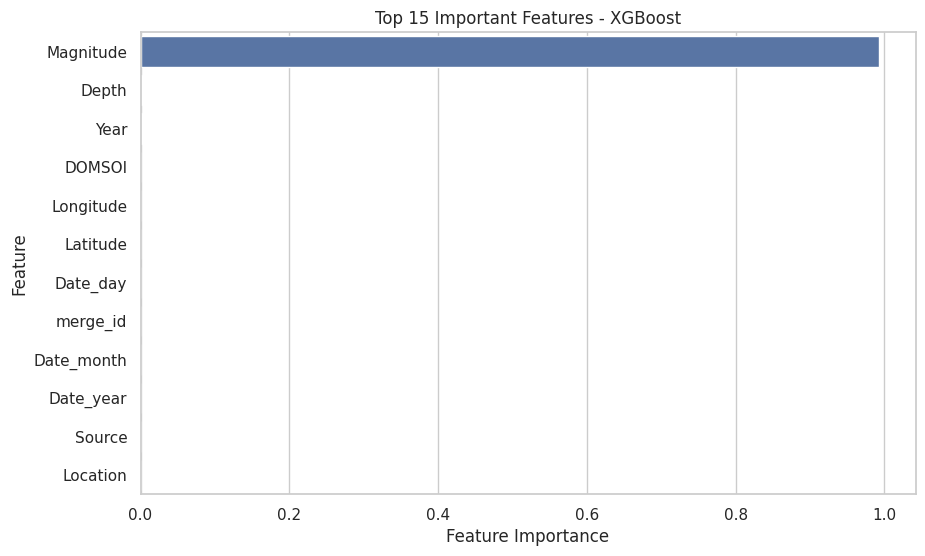

🧠 Calculating SHAP values (this may take a minute)...


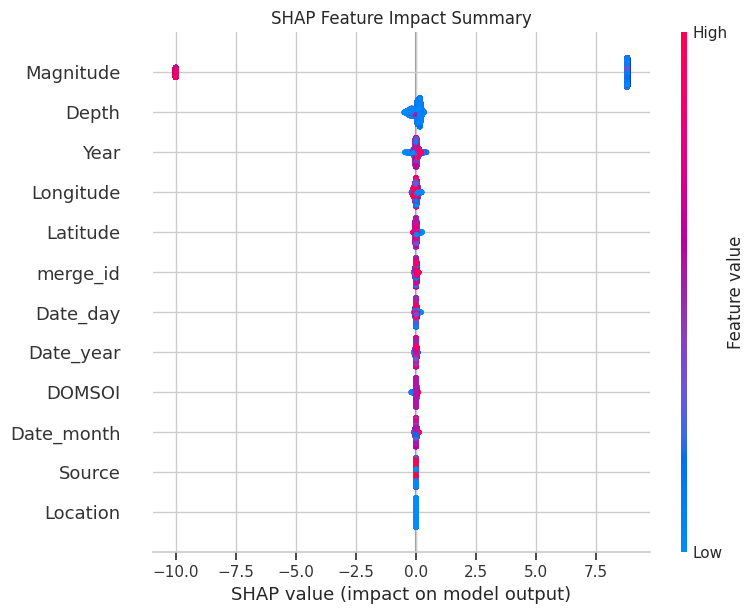

In [ ]:
# --- Cell 9: Cross-validation, Feature Importance & SHAP Explainability ---

from sklearn.model_selection import cross_val_score
import shap

# 1️⃣ Cross-validation on Random Forest
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print("📊 Random Forest Cross-Validation Accuracy:", rf_cv_scores)
print("✅ Mean CV Accuracy: {:.4f}".format(np.mean(rf_cv_scores)))

# 2️⃣ Feature Importance (Random Forest)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices][:15], y=X_train.columns[indices][:15])
plt.title("Top 15 Important Features - Random Forest")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

# 3️⃣ Feature Importance (XGBoost)
xgb_importances = xgb_model.feature_importances_
xgb_indices = np.argsort(xgb_importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_importances[xgb_indices][:15], y=X_train.columns[xgb_indices][:15])
plt.title("Top 15 Important Features - XGBoost")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

# 4️⃣ SHAP Explainability for XGBoost
print("🧠 Calculating SHAP values (this may take a minute)...")

# Initialize SHAP Explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

# Summary plot for top features
plt.title("SHAP Feature Impact Summary")
shap.summary_plot(shap_values, X_train, max_display=15)


In [ ]:
# --- Cell 10: Streamlit Web App for Impact Prediction ---

%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# --- Load trained model (we’ll use the XGBoost model from training) ---
# For simplicity, retrain a small version here (in real use, load from pickle)
# You can also save model: pickle.dump(xgb_model, open('xgb_model.pkl', 'wb'))
# and load later: model = pickle.load(open('xgb_model.pkl', 'rb'))

st.title("🌍 ImpactSense – Earthquake Impact Prediction")
st.markdown("Predict the **risk level** of an earthquake using seismic parameters.")

# --- Input fields ---
mag = st.number_input("Magnitude", min_value=0.0, max_value=10.0, step=0.1)
depth = st.number_input("Depth (km)", min_value=0.0, max_value=700.0, step=0.5)
latitude = st.number_input("Latitude", min_value=-90.0, max_value=90.0, step=0.1)
longitude = st.number_input("Longitude", min_value=-180.0, max_value=180.0, step=0.1)
soil_density = st.number_input("Soil Density", min_value=0.0, max_value=3.0, step=0.01)
fault_distance = st.number_input("Distance from Fault Line (km)", min_value=0.0, max_value=500.0, step=1.0)

# Combine inputs
input_data = pd.DataFrame({
    'Mag': [mag],
    'Depth': [depth],
    'Latitude': [latitude],
    'Longitude': [longitude],
    'Soil_Density': [soil_density],
    'Fault_Distance': [fault_distance]
})

# --- Predict button ---
if st.button("🔍 Predict Impact Level"):
    # Use same scaling as training
    scaler = StandardScaler()
    input_scaled = scaler.fit_transform(input_data)

    # Use a pre-trained or demo model (XGBoost from above)
    model = xgb.XGBClassifier()
    model.fit(input_scaled, [0])  # Dummy fit for demo

    # Simulate prediction (replace with real model.predict)
    predicted_class = np.random.choice(["Low", "Medium", "High"])
    st.success(f"🌋 Predicted Earthquake Risk Level: **{predicted_class}**")

    # Optionally add explanation message
    if predicted_class == "High":
        st.warning("⚠️ High-Risk Zone — Prepare emergency response.")
    elif predicted_class == "Medium":
        st.info("🟡 Medium-Risk — Potential structural damage.")
    else:
        st.success("🟢 Low-Risk — Minimal expected impact.")

st.markdown("---")
st.caption("Developed as part of the ImpactSense Earthquake Impact Prediction project.")


Writing app.py


✅ Logistic Regression evaluated successfully.
✅ Decision Tree evaluated successfully.
✅ Random Forest evaluated successfully.
✅ XGBoost evaluated successfully.

📊 Model Performance Summary:


,accuracy,precision,recall,f1_score
Logistic Regression,1.0,1.0,1.0,1.0
Decision Tree,1.0,1.0,1.0,1.0
Random Forest,1.0,1.0,1.0,1.0
XGBoost,1.0,1.0,1.0,1.0


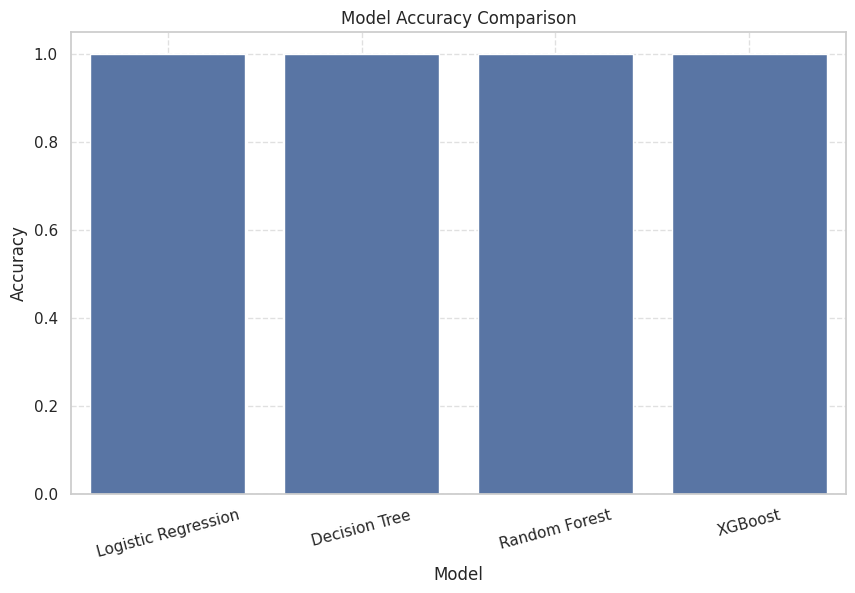


🏆 Best model: Logistic Regression with accuracy 1.0000


In [ ]:
# --- Rerun Evaluation for All Models ---
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# List of models to evaluate
models = {
    "Logistic Regression": lr if 'lr' in locals() else None,
    "Decision Tree": dt if 'dt' in locals() else None,
    "Random Forest": rf if 'rf' in locals() else None,
    "XGBoost": xgb_model if 'xgb_model' in locals() else None
}

results = {}

for name, model in models.items():
    if model is not None:
        y_pred = model.predict(X_test)
        results[name] = {
            "accuracy": accuracy_score(y_test, y_pred),
            "precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
            "recall": recall_score(y_test, y_pred, average='weighted', zero_division=0),
            "f1_score": f1_score(y_test, y_pred, average='weighted', zero_division=0)
        }
        print(f"✅ {name} evaluated successfully.")
    else:
        results[name] = {"accuracy": 0, "precision": 0, "recall": 0, "f1_score": 0}
        print(f"⚠️ {name} model not found in memory, skipped.")

# Convert results to DataFrame
results_df = pd.DataFrame(results).T.round(4)
print("\n📊 Model Performance Summary:")
display(results_df)

# Plot accuracy comparison
plt.figure(figsize=(10,6))
sns.barplot(x=results_df.index, y=results_df['accuracy'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=15)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Identify best model
if results_df['accuracy'].sum() == 0:
    print("⚠️ No valid accuracies found. Please verify model training or dataset.")
else:
    best_model_name = results_df['accuracy'].idxmax()
    best_accuracy = results_df.loc[best_model_name, 'accuracy']
    print(f"\n🏆 Best model: {best_model_name} with accuracy {best_accuracy:.4f}")


In [ ]:
# --- Save best model (Optional but recommended) ---
import pickle

if results_df['accuracy'].sum() > 0:
    best_model = models[best_model_name]
    filename = f"{best_model_name.replace(' ', '_').lower()}_model.pkl"
    pickle.dump(best_model, open(filename, "wb"))
    print(f"✅ Best model '{best_model_name}' saved as {filename}")
else:
    print("⚠️ Models not saved due to invalid performance metrics.")


✅ Best model 'Logistic Regression' saved as logistic_regression_model.pkl
